In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

### csv
#f = open ("cities.csv", "r")
#r = csv.reader(f)
#for row in r:
#      print(row)

### pandas
df = pd.read_csv('cities.csv')
print (df.count())

CityId    197769
X         197769
Y         197769
dtype: int64


In [10]:
df.head()

,CityId,X,Y
0,0,316.836739,2202.340707
1,1,4377.405972,336.602082
2,2,3454.158198,2820.053011
3,3,4688.099298,2935.898056
4,4,1010.696952,3236.750989


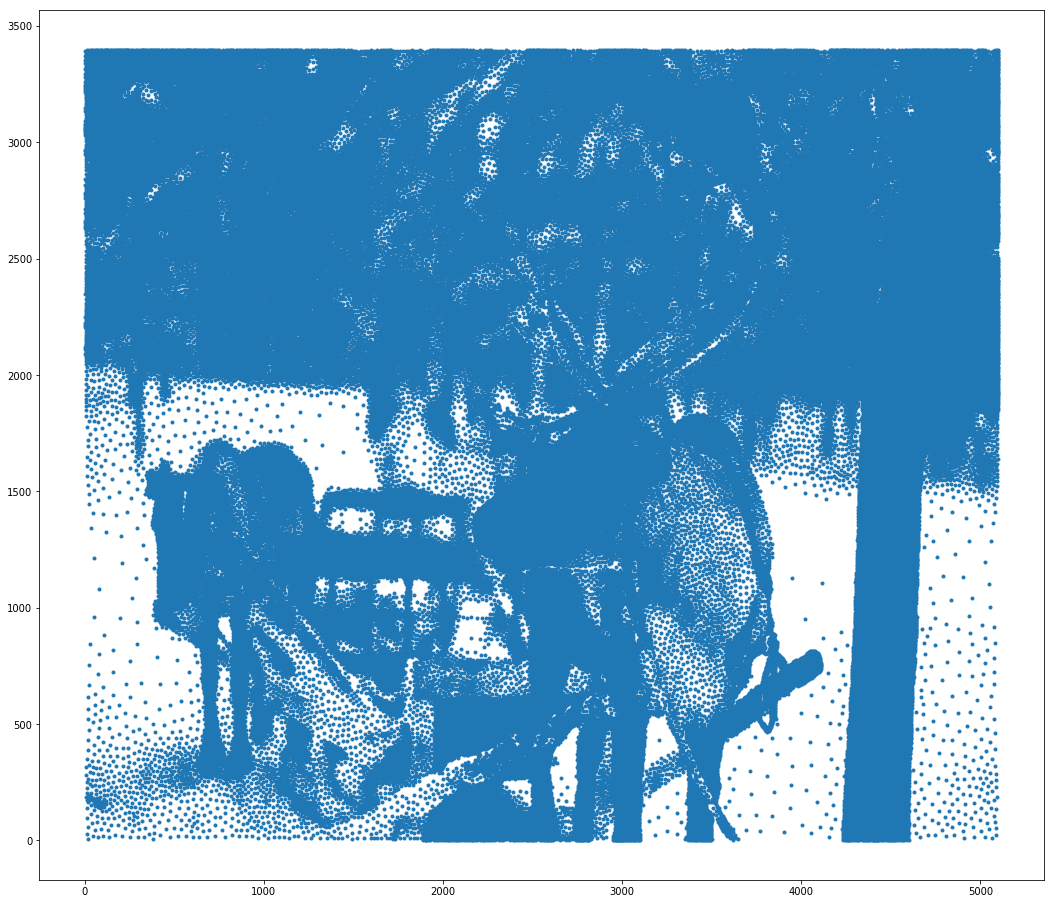

In [21]:
#df["X"]
fig = plt.figure(figsize = (18,16))
plt.plot(df["X"], df["Y"],".")

In [2]:
# кластеризация - метод k-средних
from sklearn.cluster import KMeans
import numpy as np
count_cluster = 10
kmeans = KMeans(n_clusters=count_cluster, random_state=0, ).fit(df[["X","Y"]])
kmeans.labels_
kmeans.cluster_centers_

array([[4493.43624739, 1964.51190568],
       [3172.69978632, 2847.66663866],
       [1865.54553546,  699.26952162],
       [1602.13049412, 2692.45770184],
       [4580.33395041, 2912.54691949],
       [2738.69590768, 1584.7860548 ],
       [ 842.85920845, 1085.34491273],
       [2903.35835423,  471.76878083],
       [ 508.10212677, 2793.05421251],
       [4320.89031432,  653.34140929]])

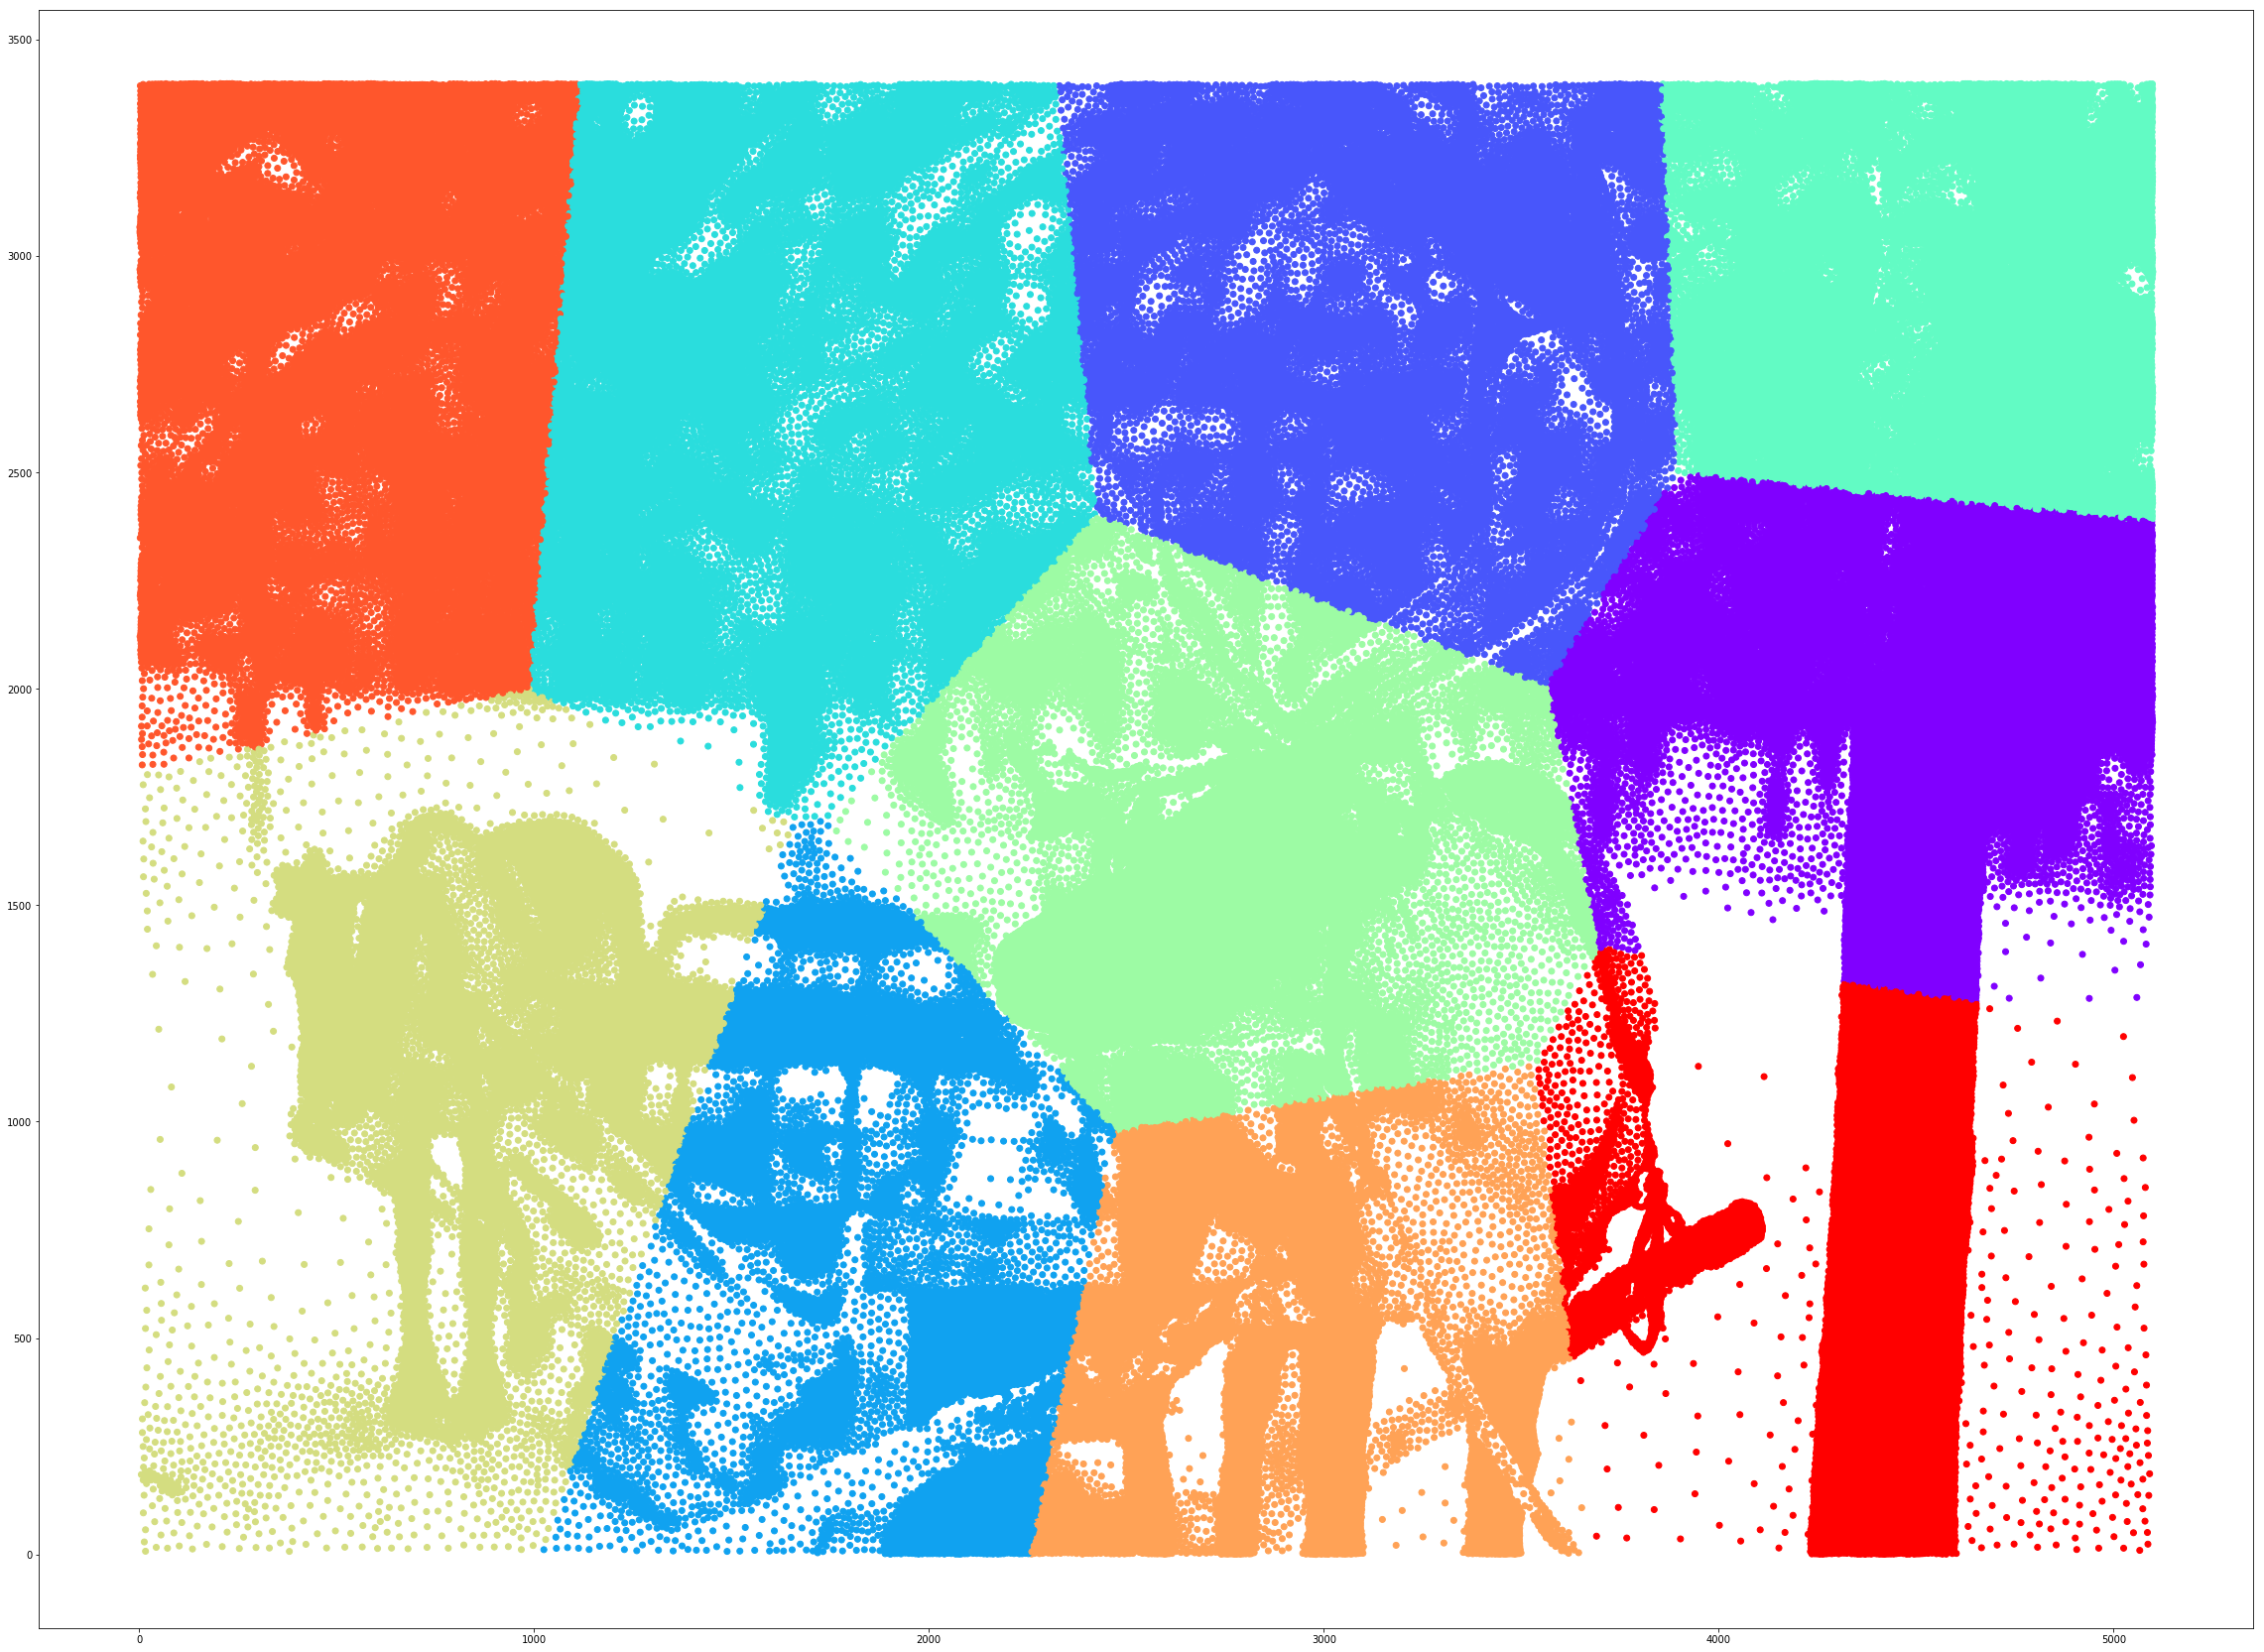

In [20]:
# создать массив цветов в формате RGB 
colors = plt.cm.rainbow(np.linspace(0, 1, count_cluster))
#colors[3] = [0,0,0,0]                      
сolorKlast = [colors[t] for t in  kmeans.labels_]

fig = plt.figure(figsize = (40,30))

plt.scatter(df["X"],df["Y"],color = сolorKlast)

In [5]:
# dataframe  со столбцом имени кластера
kdf = df.copy()
kdf["K"] = kmeans.labels_
kdf.head()

,CityId,X,Y,K
0,0,316.836739,2202.340707,8
1,1,4377.405972,336.602082,9
2,2,3454.158198,2820.053011,1
3,3,4688.099298,2935.898056,4
4,4,1010.696952,3236.750989,8


In [75]:
import math

def dist(t1,t2):
    #print (t2)
    #print (t1["X"],t1["Y"]," ",t2["X"],t2["Y"])
    #print ((t1["X"]-t2["X"])*(t1["X"]-t2["X"]))
    return math.sqrt((t1["X"]-t2["X"])*(t1["X"]-t2["X"])+(t1["Y"]-t2["Y"])*(t1["Y"]-t2["Y"]))

def greedy(data):
    #datafarme  со столбцом меткой
    temp = data.copy()
    temp["M"] = 0
    path = [] 
    i = 0
    # порядок обхода кластеров
    clusters = [0, 1 ,2 ,3 ,4 , 5, 6, 7, 8, 9]
    for k in clusters:
        print ("kluster ", k)
        # выбрать все элементы кластера
        tt = temp[(temp["K"] == k)][["CityId","X","Y","M"]]
        # пометить первый элемент 1
        tt.at[0, "M"] = 1
        # добавить точку в путь
        path.append(tt.iloc[0]["CityId"])
        # искать путь до следующей точки
        for p in range(tt.shape[0]-1):
            # выбрать все не помеченные точки
            tt = tt[(tt["M"] == 0)][["CityId","X","Y","M"]]
            # ищем минимум
            mint= 10**10
            for i, t in tt.iterrows():
                d = dist(temp.iloc[0], t)
                if  d < mint:
                    mint = d
                    ttt = t
            print (mint, ttt["CityId"] )
            path.append(ttt["CityId"])
            tt.loc[tt["CityId"]==ttt["CityId"],["M"]]= 1 
        print (path)

    #print (temp.head())
    #tt['D'] = tt.apply(lambda row: dist(tt.iloc[0],row), axis=1)
    
    #tt["D"] = tt.apply(lambda x=tt["X"], y =tt["Y"]: x * y)
    #print (tt)
    #print(temp.head())
    #m = min() 
greedy(kdf)
#dist(kdf.iloc[0],kdf.iloc[2])
    



kluster  0
3262.539003305225 80545.0
3263.460302847242 26580.0
3266.608242684302 47522.0
3266.833774245525 192888.0
3271.48609976271 85031.0
3271.895589888094 32535.0
3272.217150618489 148502.0
3272.819693873097 110039.0
3272.958805101749 81842.0
3274.2544140888276 161552.0
3276.3142339512433 186886.0
3276.567952628 162187.0
3277.3148066038243 187125.0
3278.2076640695955 29287.0
3279.1573454852473 114636.0
3279.6610132968 51307.0
3280.263856320845 26900.0
3280.3801520046736 143319.0
3280.8906194461015 4199.0
3281.1133165846295 194319.0
3281.6475485038945 98939.0
3282.7402920361124 73682.0
3283.1001930289053 26698.0
3283.178042723338 27206.0
3284.9581447367473 61086.0
3286.547219867209 62968.0
3286.7496912100273 196492.0
3286.7977130628715 111081.0
3286.9622441062565 70887.0
3287.2640221450597 105510.0
3287.45725293206 68925.0
3287.5601112806903 147103.0
3288.6498378792703 37380.0
3289.9634128064627 144316.0
3290.0615991317095 57239.0
3290.373775254127 147448.0
3290.595471634241 162410.

3362.295573862646 128982.0
3362.3693183109167 64312.0
3362.6859182577264 35496.0
3363.154730958805 169076.0
3363.2147684845404 153817.0
3363.3442460299148 37781.0
3363.3874225404 105445.0
3363.411063460879 123522.0
3363.568861122152 174882.0
3363.6962194379266 82997.0
3363.7368426266835 8898.0
3363.7636466092795 71624.0
3364.1668497849964 158016.0
3364.588965727337 11751.0
3364.629400769524 94820.0
3364.7632500978902 15176.0
3364.7788253030953 53923.0
3364.977741312844 36170.0
3365.044045113969 53652.0
3365.5791227189347 139126.0
3365.6228023374947 37825.0
3365.8549170021747 125817.0
3366.015557736411 128948.0
3366.7876269828243 191859.0
3366.8325766066973 169747.0
3367.0173817563477 130796.0
3367.151784339684 100797.0
3367.245756587538 82752.0
3367.2564813217955 82551.0
3367.3351650851528 80035.0
3367.937520557379 146170.0
3368.1599451882767 188212.0
3368.609869289751 66398.0
3368.633064178675 155923.0
3369.5750369561288 20804.0
3369.5764858607654 38129.0
3369.820379454604 186330.0
33

3411.1153257282044 109430.0
3411.295080010031 143825.0
3411.5497913586883 47381.0
3411.5639424962205 192068.0
3411.604913063237 182200.0
3411.7706214233617 62051.0
3411.7881856731124 134844.0
3411.7972328534697 192010.0
3411.8672691912175 137596.0
3411.90648239663 17776.0
3411.9954429166964 109636.0
3412.0890214494348 136753.0
3412.1420519092258 162496.0
3412.1717597415463 136123.0
3412.8262045670635 82558.0
3413.027974442995 100394.0
3413.458477306081 188323.0
3413.5039289594274 84510.0
3413.615738279405 55720.0
3413.951318248034 187781.0
3413.989279838169 144082.0
3414.08946498889 158668.0
3414.111607483015 96267.0
3414.178404406435 23689.0
3414.4224260595774 30674.0
3414.422454496042 168332.0
3414.625488276911 107150.0
3414.6925867714695 154520.0
3414.8712105184754 28668.0
3414.916981347939 50412.0
3415.1516468045656 55848.0
3415.414862897153 145653.0
3415.599487829401 21048.0
3415.707582795925 174679.0
3415.9085295355185 158859.0
3416.016923357778 138986.0
3416.068788777869 106739.

3454.4684262695587 68104.0
3454.846946673306 46838.0
3454.882980199676 38995.0
3455.2442178000847 80981.0
3455.396646255645 123406.0
3455.4578877571385 5909.0
3455.7494803382183 130141.0
3455.868767652931 132554.0
3455.8920723066003 96000.0
3455.9416491468205 175182.0
3455.956903921974 194860.0
3456.489729778661 151052.0
3456.596447955026 188604.0
3456.688584522529 102064.0
3456.8669619879265 195474.0
3457.5565674494046 185742.0
3457.615555170443 93558.0
3457.632199806088 79616.0
3457.680262513401 69467.0
3457.694070097423 188990.0
3458.290467430171 38714.0
3458.5121168540036 116587.0
3458.5779471247906 11309.0
3459.195241756089 63762.0
3459.291564802399 59986.0
3459.325368632184 30776.0
3459.5571398450743 59029.0
3459.574785403807 152367.0
3459.812854299702 25965.0
3459.8839581807047 118868.0
3459.98713037715 180276.0
3460.028021340025 193604.0
3460.21612545754 19979.0
3460.626750490923 170922.0
3460.8275386198375 110764.0
3460.8628555358864 179690.0
3461.046720652149 179410.0
3461.16

3496.0487162711843 66317.0
3496.0751950681342 146894.0
3496.25793281431 49396.0
3496.327372014893 90985.0
3496.3890897516317 69542.0
3496.5034663377633 86001.0
3496.7572565994383 94698.0
3496.800975840996 104416.0
3496.925634074862 185903.0
3497.0046573604027 9631.0
3497.360658144612 151565.0
3497.396381711343 147471.0
3497.5394535448813 59743.0
3497.601313859516 75937.0
3497.612673270545 49140.0
3497.642580734502 43307.0
3497.790101571081 45385.0
3497.831300647179 76760.0
3498.027455863542 175406.0
3498.0558626984002 16287.0
3498.1289215204765 1838.0
3498.2189746368713 192057.0
3498.2297965245975 66496.0
3498.238155987681 31703.0
3498.297854541778 16220.0
3498.3033210759236 99395.0
3498.44226451325 130372.0
3498.5700897646 111248.0
3498.628304849347 165072.0
3498.628780537979 132634.0
3498.728532497265 149582.0
3499.0349176201744 175260.0
3499.2383190732357 163881.0
3499.241911055196 60853.0
3499.372642606139 170848.0
3499.377710042443 135047.0
3499.4282024758018 97363.0
3499.46836053

3524.494933452506 183343.0
3524.6375018882277 126528.0
3524.6431550503985 76992.0
3524.930503825399 172493.0
3525.0558312479716 59735.0
3525.20227897265 133773.0
3525.45006151864 186451.0
3525.4790953966103 79375.0
3525.6689104315383 167782.0
3525.672769712549 24569.0
3525.8966761425327 9318.0
3526.241336152388 75195.0
3526.3421191299108 100189.0
3526.448477865798 47321.0
3526.453883415003 102150.0
3526.511030194512 77057.0
3526.803833318619 100910.0
3526.8127890055803 175971.0
3527.343519739374 143271.0
3527.4220293563267 194688.0
3527.505774218625 125933.0
3527.9112063666116 171232.0
3527.9130092195273 141481.0
3527.923554374208 169254.0
3528.035381981797 25430.0
3528.183344363746 35266.0
3528.2145673073373 155498.0
3528.3846945126384 56050.0
3528.497959972335 103835.0
3528.5187438942057 40089.0
3528.65065560467 82972.0
3528.6939049385146 8290.0
3528.7209370916307 140383.0
3528.751812782356 156759.0
3528.8087935590493 94454.0
3528.8632669616904 163124.0
3529.1416535256967 145315.0
35

3560.3036501525494 118215.0
3560.7734003655614 121207.0
3561.0220776810966 111338.0
3561.077567139457 17346.0
3561.255042879754 176025.0
3561.356966532561 156125.0
3561.4161545389316 14891.0
3561.498601473694 147520.0
3561.539714522333 6969.0
3561.686422301345 66749.0
3561.857434729473 6153.0
3561.9428721176223 90851.0
3562.024488754266 31009.0
3562.063585222606 163274.0
3562.466962866507 15639.0
3562.6425010158546 37474.0
3562.9258012803634 130986.0
3562.9868415068013 76852.0
3563.0854465864113 1058.0
3563.1852778911893 185583.0
3563.261817971892 104883.0
3563.409857877334 173069.0
3563.4131822845015 50831.0
3563.739484407312 50225.0
3563.786114984815 150661.0
3564.1124264354394 134726.0
3564.3860067093556 178789.0
3564.707901363691 97229.0
3565.011311328567 185066.0
3565.069668119215 196973.0
3565.2414676149347 163605.0
3565.347006156386 50924.0
3565.405096152336 148384.0
3565.4275402696794 32778.0
3565.4291816017085 42174.0
3565.577058783888 139989.0
3565.614288460052 29322.0
3566.0

3602.51641987536 180384.0
3602.5445975425837 128425.0
3602.6408558326025 12439.0
3602.6963726757303 106663.0
3602.8539618413843 171786.0
3603.039806832387 82634.0
3603.1915060161195 139633.0
3603.44003220007 29295.0
3603.4443517250043 140925.0
3603.472898986097 54188.0
3603.6139466850927 114113.0
3603.982265419959 89379.0
3604.1831375376314 79395.0
3604.2224412816063 76937.0
3604.4488627198916 195825.0
3604.4725765111725 117136.0
3604.542635277029 194476.0
3604.551843784757 161846.0
3604.5714905292893 66235.0
3604.5900562170887 169705.0
3604.7227310245053 166677.0
3604.9839836464284 32156.0
3605.0172435492937 172197.0
3605.1764502948954 130327.0
3605.220734790962 187884.0
3605.3375189729386 47650.0
3605.875632799646 148568.0
3605.992780612766 166114.0
3606.0648343422986 96246.0
3606.329985456768 133956.0
3606.3779813609945 157818.0
3606.448210680359 90532.0
3606.5057556331535 5124.0
3606.576234672842 116542.0
3606.700178742195 143473.0
3606.803170467768 60154.0
3607.1810263674793 18605

3646.2225312977407 8676.0
3646.337018680036 132369.0
3646.6950082719723 110609.0
3646.88572600554 136705.0
3647.159190996547 94976.0
3647.2884459977395 151339.0
3647.3297775355195 137286.0
3647.4244135218796 130113.0
3647.617398367246 26008.0
3647.7335229989717 145710.0
3648.043236226725 97471.0
3648.0445151694316 17988.0
3648.222609347939 157885.0
3648.227151008784 17053.0
3648.351945882382 106610.0
3648.5317088898832 114364.0
3648.712655069154 17740.0
3649.0892034623457 25029.0
3649.3785044142255 26708.0
3649.4925525051685 271.0
3649.5196619222984 163299.0
3649.5569008858038 158581.0
3649.646075170186 187862.0
3649.835044462169 75200.0
3649.885581230264 148108.0
3650.0162695527792 11282.0
3650.0576944755503 38876.0
3650.0601813497055 105485.0
3650.2393640896094 166937.0
3650.365378430094 140086.0
3650.4247464521 63682.0
3650.4380831574617 117402.0
3650.4429474925146 2057.0
3650.453278087522 85988.0
3650.5933998280607 125822.0
3651.031755095665 111994.0
3651.3652052981147 17644.0
3651

3690.580086470199 170059.0
3690.5996493383727 176470.0
3690.6143641468852 107737.0
3690.6588414614057 96699.0
3690.834483817334 178819.0
3691.4430460056647 22529.0
3691.5926984951802 60545.0
3691.6251837462783 23481.0
3691.8568824881654 163840.0
3692.098470693838 195609.0
3692.220384696356 195546.0
3692.4663140740904 45862.0
3692.4933410624812 48840.0
3692.792856123052 22452.0
3692.824165640284 167851.0
3692.8697393469292 18172.0
3692.900105042097 152930.0
3692.9646269979553 189808.0
3693.355563565496 103397.0
3693.5179189419778 89452.0
3693.5377146437463 21320.0
3693.6351072114567 11256.0
3693.6469569856094 135650.0
3693.9818707808217 143576.0
3694.1163400749583 114373.0
3694.202030341762 185799.0
3694.3249692245586 55470.0
3694.379451549085 86533.0
3694.5575549652062 110365.0
3694.787446275791 104577.0
3694.8813641846223 128380.0
3695.0352892128244 182906.0
3695.235991684512 67410.0
3695.282566861083 51574.0
3695.300391384252 54095.0
3695.3163125892925 94131.0
3695.608450259583 19238

3728.5332145583657 47509.0
3728.6712567115956 170596.0
3728.917335502694 11804.0
3729.0088844746265 166737.0
3729.0548713947164 182754.0
3729.093162296788 78270.0
3729.115162268911 146169.0
3729.159037066231 140779.0
3729.227105796095 69040.0
3729.284713526574 178653.0
3729.345395021803 17681.0
3729.547684066845 46357.0
3729.552364152055 182601.0
3729.652508025851 171170.0
3729.758380015946 23162.0
3730.0378604558337 115605.0
3730.172625433256 7922.0
3730.3202828653966 148526.0
3730.38710590665 160531.0
3730.530837588196 73352.0
3730.7712835878615 99455.0
3730.7783292520226 27357.0
3730.869817154152 174171.0
3730.8890115507575 130421.0
3731.0708111961762 190317.0
3731.1280208540893 67333.0
3731.2921371924913 191419.0
3731.476831445022 155885.0
3731.5338499548393 191113.0
3731.701358051275 39905.0
3731.707307718301 169980.0
3731.7121491847734 39000.0
3731.7499810950712 127821.0
3731.8921346571105 145325.0
3731.901448045826 39582.0
3731.9171787711707 146732.0
3732.102018923343 7095.0
373

3758.474843511163 5297.0
3758.5342680409917 1339.0
3758.646222809563 38016.0
3758.65033331013 49036.0
3758.764600091571 110338.0
3758.836554993875 33213.0
3758.8506844817316 164719.0
3758.875098338851 16552.0
3758.879815662409 127146.0
3758.9369214778603 176420.0
3759.2021388260814 46866.0
3759.379948457436 63439.0
3759.3874689960803 65768.0
3759.4034276240077 148118.0
3759.4321189322095 99055.0
3759.436671210514 111208.0
3759.5847746566083 112209.0
3759.5886037275895 97589.0
3759.717085078228 136158.0
3759.9750930936093 190211.0
3759.995264103595 9466.0
3760.0079252719543 4809.0
3760.077772300317 167849.0
3760.1562858580123 66534.0
3760.1599090174514 122911.0
3760.4329812668216 3240.0
3760.451466841538 42570.0
3760.5491355706213 12765.0
3760.580960397531 87841.0
3760.6611190416274 116418.0
3760.6951612896582 154424.0
3760.881349706209 128540.0
3760.9128915792858 56746.0
3760.963408755066 72833.0
3761.094767474652 178688.0
3761.240466062278 33874.0
3761.299406118308 152421.0
3761.31218

3792.338040630431 17397.0
3792.4294764608358 155015.0
3792.5154704755078 36447.0
3792.654415095457 7011.0
3792.741929346536 178059.0
3792.7669285272054 133531.0
3792.811529605482 39805.0
3792.9936751633913 92415.0
3793.207796545562 156168.0
3793.3377156362503 6973.0
3793.52607203207 141233.0
3793.5653061910584 70089.0
3793.667501566369 73464.0
3793.7264592777283 49896.0
3793.8565761130485 151753.0
3794.052575886835 176101.0
3794.063576801552 52382.0
3794.0695022563464 114239.0
3794.3049333123004 117806.0
3794.3158856321406 177224.0
3794.391050714389 16465.0
3794.7167840557877 163925.0
3794.8402101740717 122474.0
3794.907444786418 135874.0
3795.0553648192426 111620.0
3795.1367660781275 17010.0
3795.265174288189 152985.0
3795.344601144509 21349.0
3795.412283947072 192695.0
3795.6042722752736 157187.0
3795.633430989957 142165.0
3795.6414972342586 53938.0
3795.7326039740924 135030.0
3795.7463441598015 18250.0
3795.7589963711353 151285.0
3796.0633435626137 74899.0
3796.4196336825194 42232.0

3823.72160080866 167530.0
3823.728151551764 154104.0
3823.739442584531 83919.0
3824.0073134955855 65227.0
3824.1085701273773 42322.0
3824.126780310556 77189.0
3824.1609389095197 72290.0
3824.352188920504 177716.0
3824.382695244132 193257.0
3824.4726800962303 86401.0
3824.5270220929315 19304.0
3824.572226124024 72358.0
3824.5858228230472 145285.0
3824.648103791093 55464.0
3824.6827794775354 127412.0
3824.919584853386 47957.0
3825.0016615278805 128216.0
3825.0044632077174 159869.0
3825.047466873108 154516.0
3825.13995384168 150911.0
3825.1827590061 158339.0
3825.2063208711656 147848.0
3825.238686385639 94890.0
3825.269900110061 24870.0
3825.304454667218 85072.0
3825.5265088690585 4092.0
3825.692030408518 144609.0
3825.777086439483 373.0
3825.8883475052817 57678.0
3826.0390923175555 180821.0
3826.0584368149075 8023.0
3826.166078012114 189860.0
3826.258234773747 99399.0
3826.539065264159 36490.0
3826.5413902473488 99706.0
3826.6539175366293 185482.0
3826.670797330792 159526.0
3826.71811371

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-76-a0ca23859c0c>", line 48, in <module>
    greedy(kdf)
  File "<ipython-input-76-a0ca23859c0c>", line 31, in greedy
    for i, t in tt.iterrows():
  File "C:\Anaconda3\lib\site-packages\pandas\core\frame.py", line 775, in iterrows
    s = klass(v, index=columns, name=k)
  File "C:\Anaconda3\lib\site-packages\pandas\core\series.py", line 277, in __init__
    data = SingleBlockManager(data, index, fastpath=True)
  File "C:\Anaconda3\lib\site-packages\pandas\core\internals.py", line 4677, in __init__
    block = make_block(block, placement=slice(0, len(axis)), ndim=1)
  File "C:\Anaconda3\lib\site-packages\pandas\core\internals.py", line 3205, in make_block
    return klass(values, ndim=ndim, placement=placement)
  File "C:\Anaconda3\lib\site-packages\pandas\core\internals.py", line

KeyboardInterrupt: 

KeyboardInterrupt: 

In [ ]:
with open('answer.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    for item in path:
        csv_writer.writerow([item])